In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from numpy import vectorize

In [2]:
myfont = FontProperties(fname='NotoSansTC-Medium.otf')

In [3]:
df = pd.read_excel('2022GM.xlsx', sheet_name='總表_cooper')
df.dropna(subset=['金額','參與人次'], inplace=True)
df = df[df['金額']>0]
df['月份'] = df['月份'].astype(int)
df['客單價'] = df['金額'] / df['參與人次']
def population(site):
    if site == 'All':
        return 2300+3300+3700+1200
    elif site == 'T1':
        return 2300
    elif site == 'T2':
        return 3300
    elif site == 'T3':
        return 3700
    elif site == 'T5':
        return 1200
    else:
        return None
df['廠別總人數'] = vectorize(population)(df['廠別'])
df['參與率'] = 100*(df['參與人次'] / df['廠別總人數']).round(4)
df.head()

,日期,月份,單位,性質,SDGs,公益團體,金額,數量,參與人次,廠別,報告期別,客單價,廠別總人數,參與率
3,2022-05-01 00:00:00,5,SSC,捐款,SDG 1,桃園創世基金會-植物人,232000.0,NaN,232.0,All,NaN,1000.000000,10500,2.21
4,2022-05-01 00:00:00,5,SSC,捐款,SDG 3,主婦聯盟,29000.0,NaN,29.0,All,NaN,1000.000000,10500,0.28
5,2022-05-01 00:00:00,5,SSC,捐款,SDG 15,石虎保育協會,64000.0,NaN,64.0,All,NaN,1000.000000,10500,0.61
8,2022-08-05 00:00:00,8,志工社,認購,SDG 1,觀音愛心家園\n(觀音愛心家園中秋志工招募-當日商品認購),10380.0,NaN,25.0,All,8.0,415.200000,10500,0.24
11,2022-01-12 00:00:00,1,職福會,認購,SDG 1,臺北市庇護工場春節禮盒,176900.0,305.0,198.0,T1,NaN,893.434343,2300,8.61


活動的"性質"成效

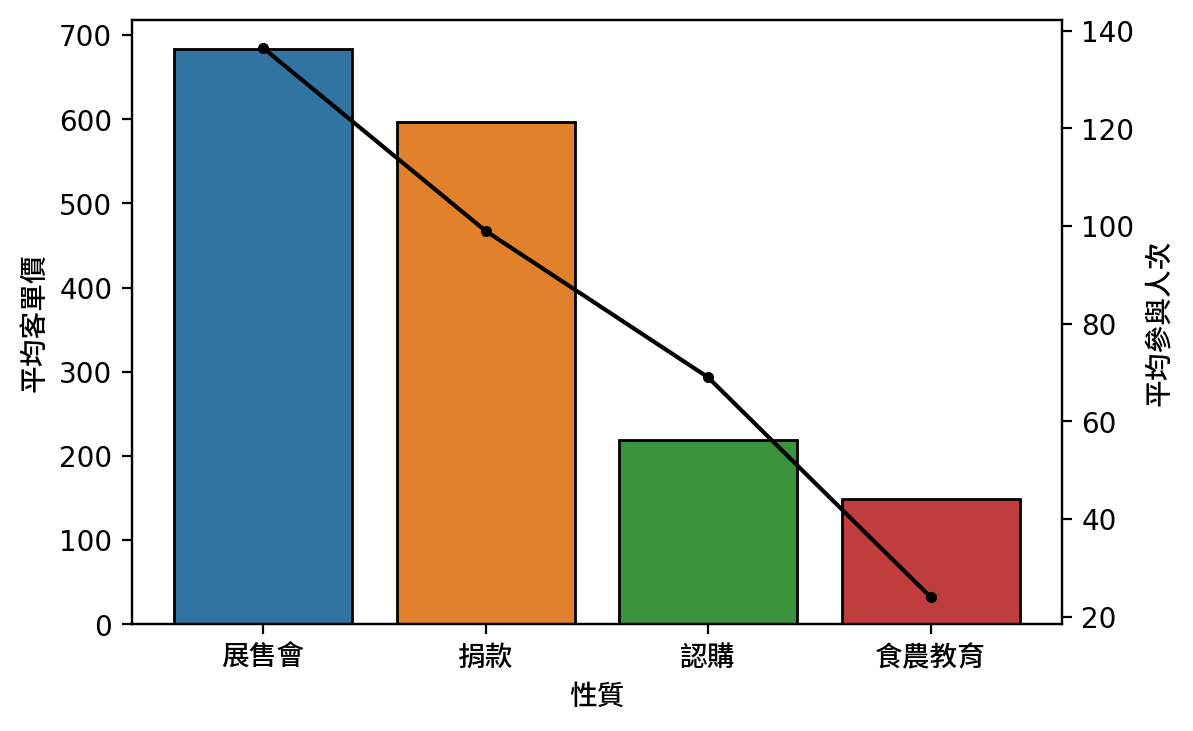

In [7]:
fig_property, ax1 = plt.subplots(dpi=200)
ax2 = ax1.twinx()

sns.barplot(data=df, x='性質', y='客單價', ci=None, ax=ax1, edgecolor='black')
ax1.set_xlabel('性質',fontproperties=myfont);
ax1.set_xticklabels(['展售會','捐款','認購','食農教育'],fontproperties=myfont);
ax1.set_ylabel('平均客單價',fontproperties=myfont);

df.groupby('性質')['參與人次'].mean().plot(ax=ax2, color='black', style='.-');
ax2.axes.set_ylabel('平均參與人次',fontproperties=myfont);

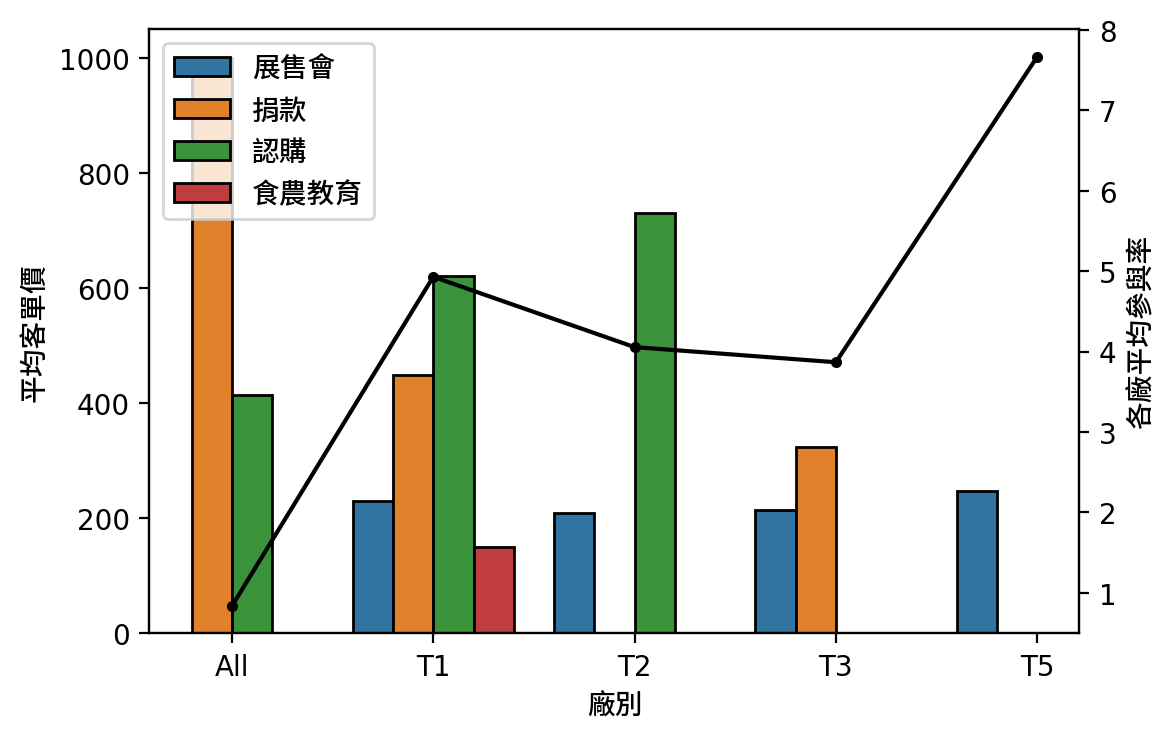

In [108]:
fig = plt.figure(dpi=200);
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

sns.barplot(data=df, x='廠別', y='客單價', hue='性質', ci=None, ax=ax1, hue_order=['展售會','捐款','認購','食農教育'], edgecolor='black')
ax1.axes.set_xlabel('廠別',fontproperties=myfont);
ax1.axes.set_ylabel('平均客單價',fontproperties=myfont);
ax1.legend(prop=myfont);

df.groupby('廠別')['參與率'].mean().plot(ax=ax2, color='black', style='.-');
ax2.axes.set_ylabel('各廠平均參與率',fontproperties=myfont);

性質比例

In [66]:
df_propotion = df.groupby('性質').count()['金額'].to_frame()
df_propotion['比例'] =100*(df_propotion['金額']/df_propotion['金額'].sum())
df_propotion.sort_values('比例', ascending=False, inplace=True)

In [67]:
from numpy import cumsum
df_propotion['累積比例'] = cumsum(df_propotion['比例'])
df_propotion

,金額,比例,累積比例
性質,,,
展售會,39,78.0,78.0
捐款,6,12.0,90.0
認購,4,8.0,98.0
食農教育,1,2.0,100.0


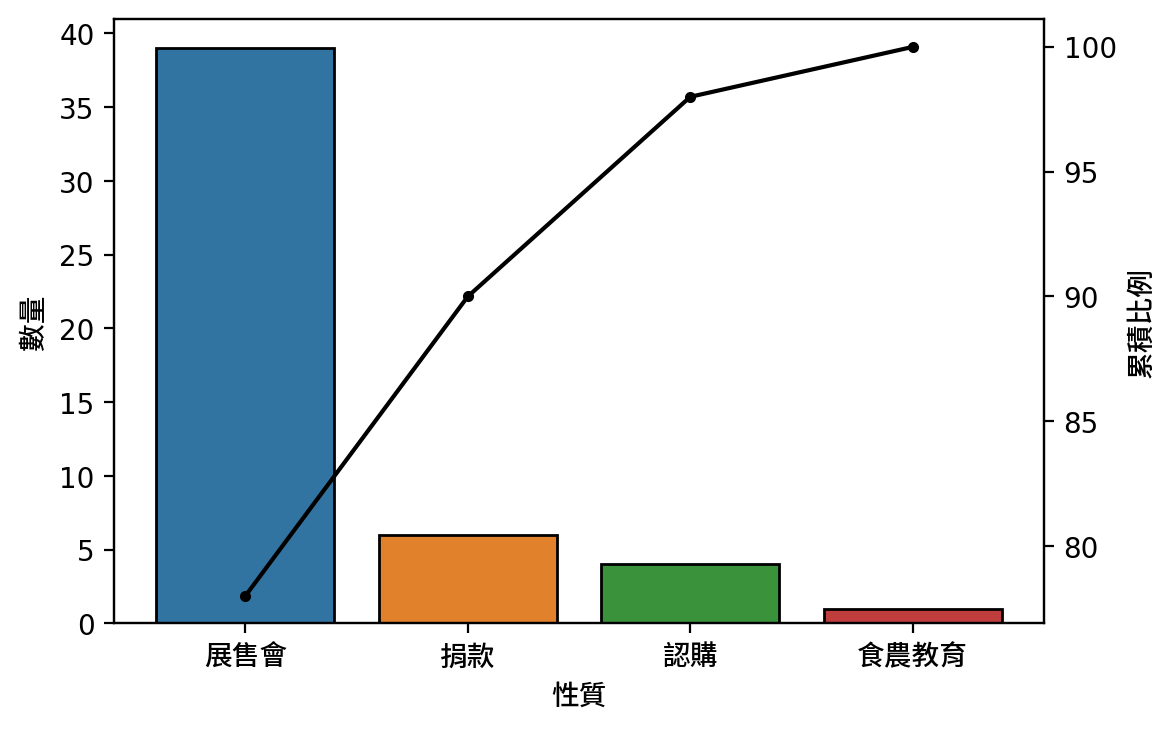

In [109]:
fig_propotion =  plt.figure(dpi=200);
ax1 = fig_propotion.add_subplot()
ax2 = ax1.twinx()

sns.barplot(ax=ax1, data=df_propotion, x=df_propotion.index ,y='金額', edgecolor='black');
ax1.set_xlabel('性質',fontproperties=myfont);
ax1.set_ylabel('數量',fontproperties=myfont);
ax1.set_xticklabels(['展售會','捐款','認購','食農教育'],fontproperties=myfont);

df_propotion['累積比例'].plot(ax=ax2, color='black', style='.-')
ax2.set_ylabel('累積比例',fontproperties=myfont);

SDG比例

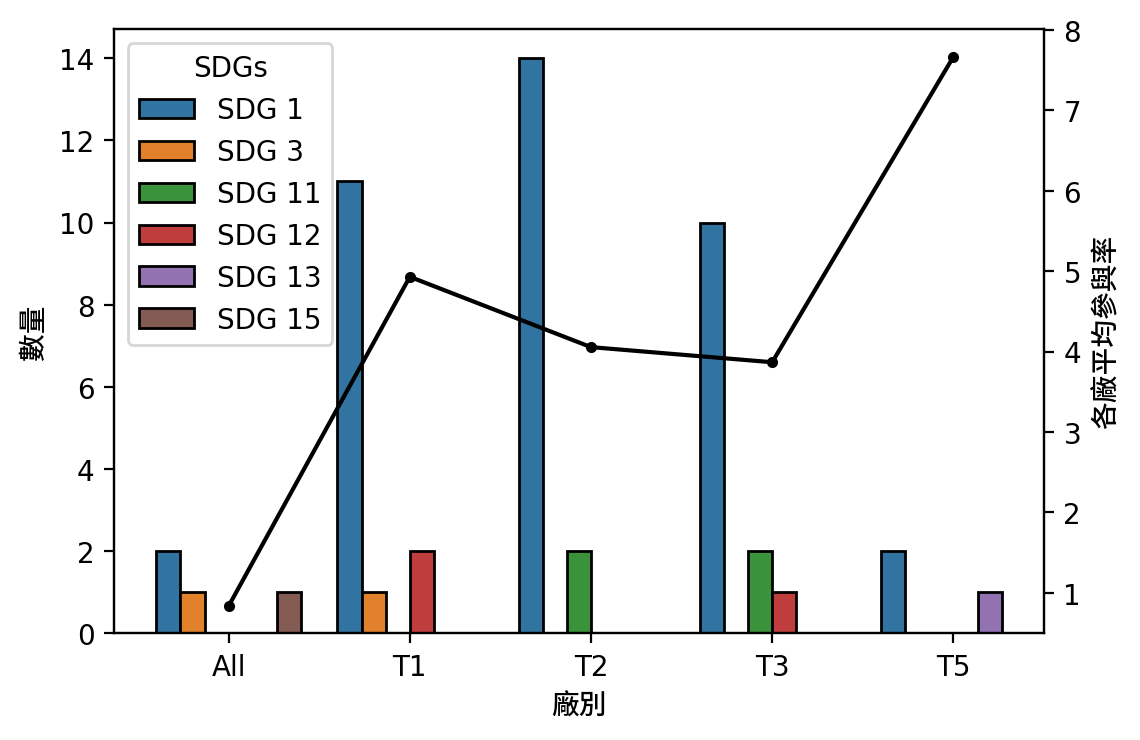

In [110]:
fig_SDG = plt.figure(dpi=200);
ax1 = fig_SDG.add_subplot()
ax2 = ax1.twinx()

sns.countplot(data=df, x='廠別', hue='SDGs', hue_order=['SDG 1','SDG 3','SDG 11','SDG 12','SDG 13','SDG 15'],ax=ax1, edgecolor='black')
ax1.set_xlabel('廠別',fontproperties=myfont);
ax1.set_ylabel('數量',fontproperties=myfont);

df.groupby('廠別')['參與率'].mean().plot(ax=ax2, color='black', style='.-');
ax2.set_ylabel('各廠平均參與率',fontproperties=myfont);

月份

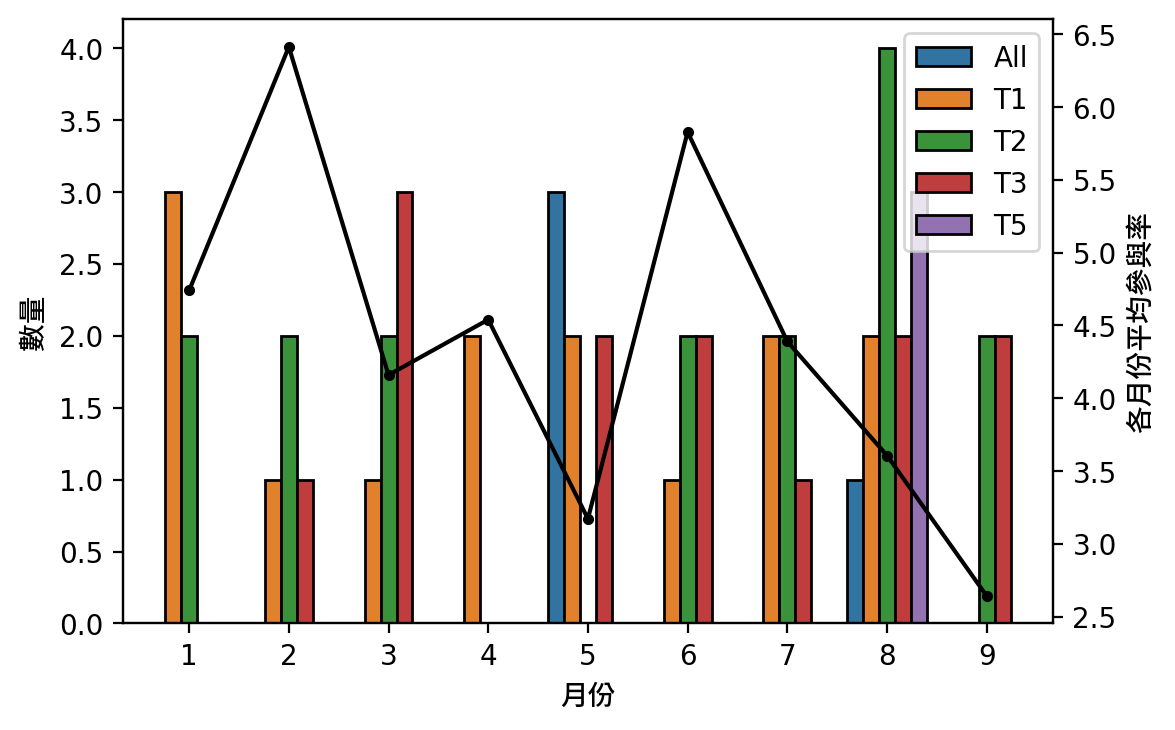

In [111]:
fig_month = plt.figure(dpi=200);
ax1 = fig_month.add_subplot();
ax2 = ax1.twinx();

sns.countplot(data=df, x='月份', hue='廠別', ax=ax1, edgecolor='black')
ax1.set_xlabel('月份',fontproperties=myfont);
ax1.set_ylabel('數量',fontproperties=myfont);
ax1.legend();

df_temp = df.groupby('月份')['參與率'].mean()
df_temp.index = df_temp.index-1

df_temp.plot(ax=ax2, color='black', style='.-');
ax2.set_ylabel('各月份平均參與率',fontproperties=myfont);